# Logistic Regression Project 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**


## Imports

**Importing the necessary libraries.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay
from sklearn.dummy import DummyClassifier
from joblib import dump, load


## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# 1. Loading & Inspecting the Data

---

Before diving into analysis, we will:

- Read `heart.csv` into a pandas DataFrame  
- Display the dataset’s shape (rows × columns)  
- Peek at the first few rows to confirm successful load  
- Review column names and data types for sanity checks  

In [3]:
df = pd.read_csv('DATA/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].unique()

array([1, 0])

## 2 Exploratory Data Analysis and Visualization



Before modeling, it’s important to understand our data. In this section we will:

1.  **Check for Missing Values**  
    – Identify any `NaN` or null entries that could affect downstream analysis.  
2.  **Inspect Data Types & Completeness**  
    – Use `.info()` to verify feature types and non-null counts.  
3.  **Generate Descriptive Statistics**  
    – Use `.describe()` to examine measures of central tendency and dispersion for numerical features.  
4.  **Initial Visualizations**  
    – Plot feature distributions, outliers, and correlations to uncover patterns or anomalies.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualizations

**Creating a bar plot that shows the total counts per target value.**

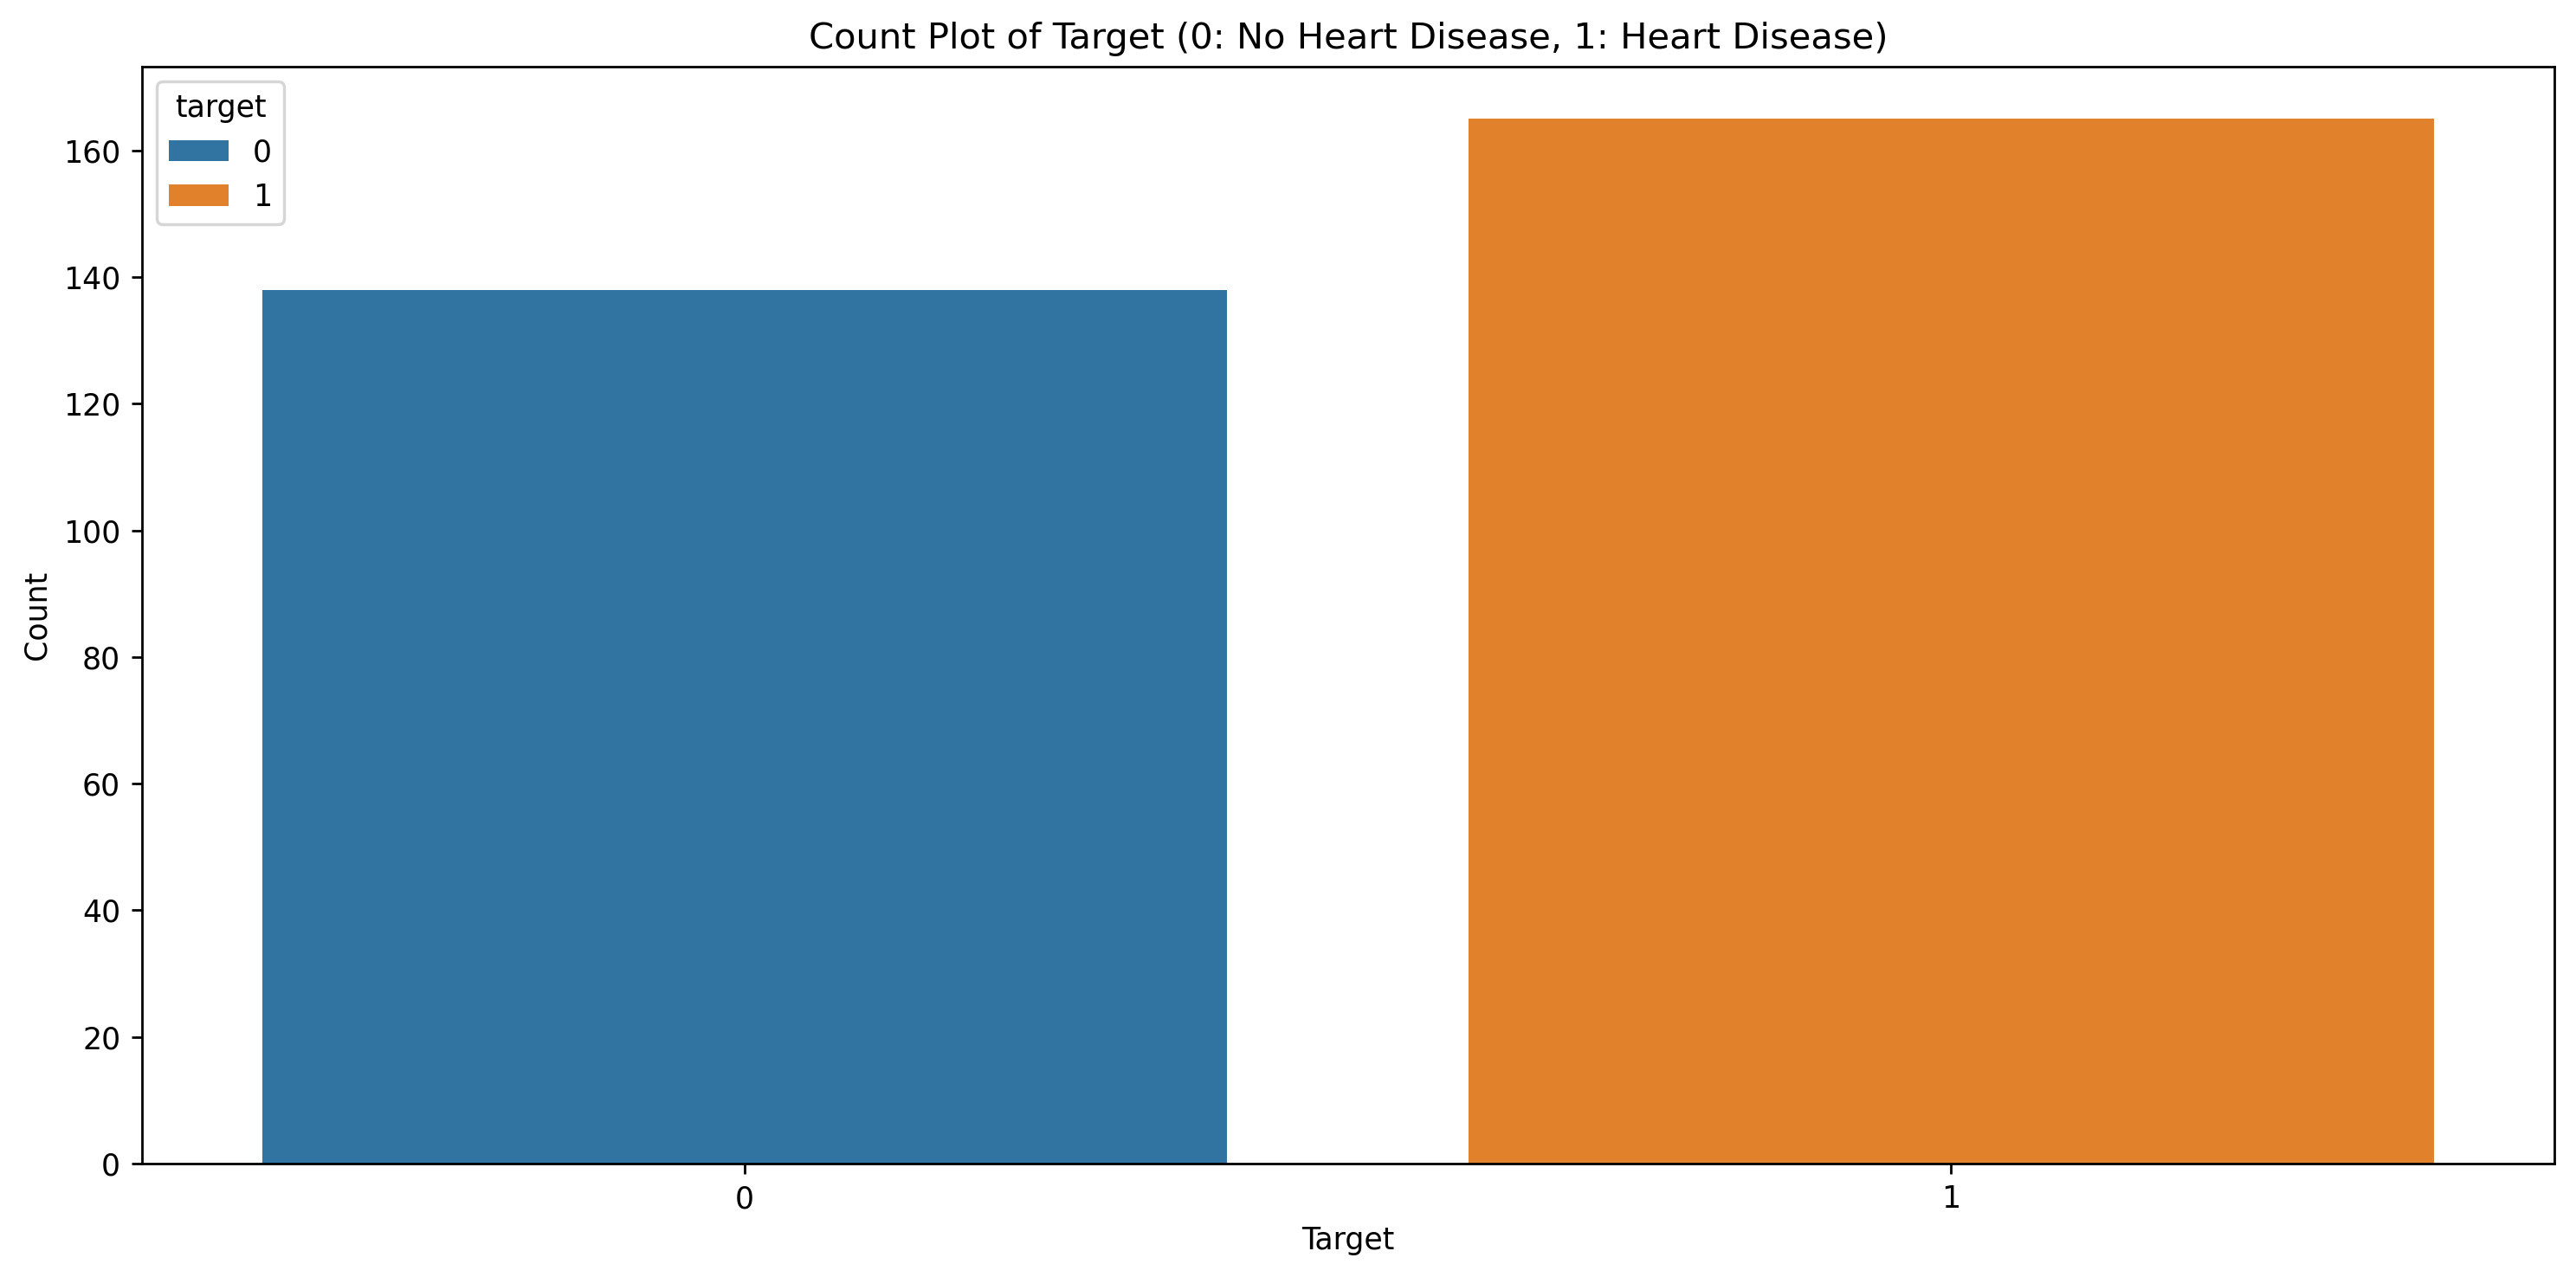

In [8]:
plt.figure(figsize=(12,6),dpi=250)
sns.countplot(x='target',data=df,hue='target')
plt.title('Count Plot of Target (0: No Heart Disease, 1: Heart Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('visualisations/count_plot_of_target.png');

## Univariate Distributions of Continuous Features

Below we look at each continuous variable’s distribution split by heart disease status (`target`).  
- **Left column**: raw count histograms  
- **Right column**: overlaid kernel-density estimates (KDEs)  

This helps us see not only the absolute counts but also how the shapes shift when `target=1` vs. `0`.

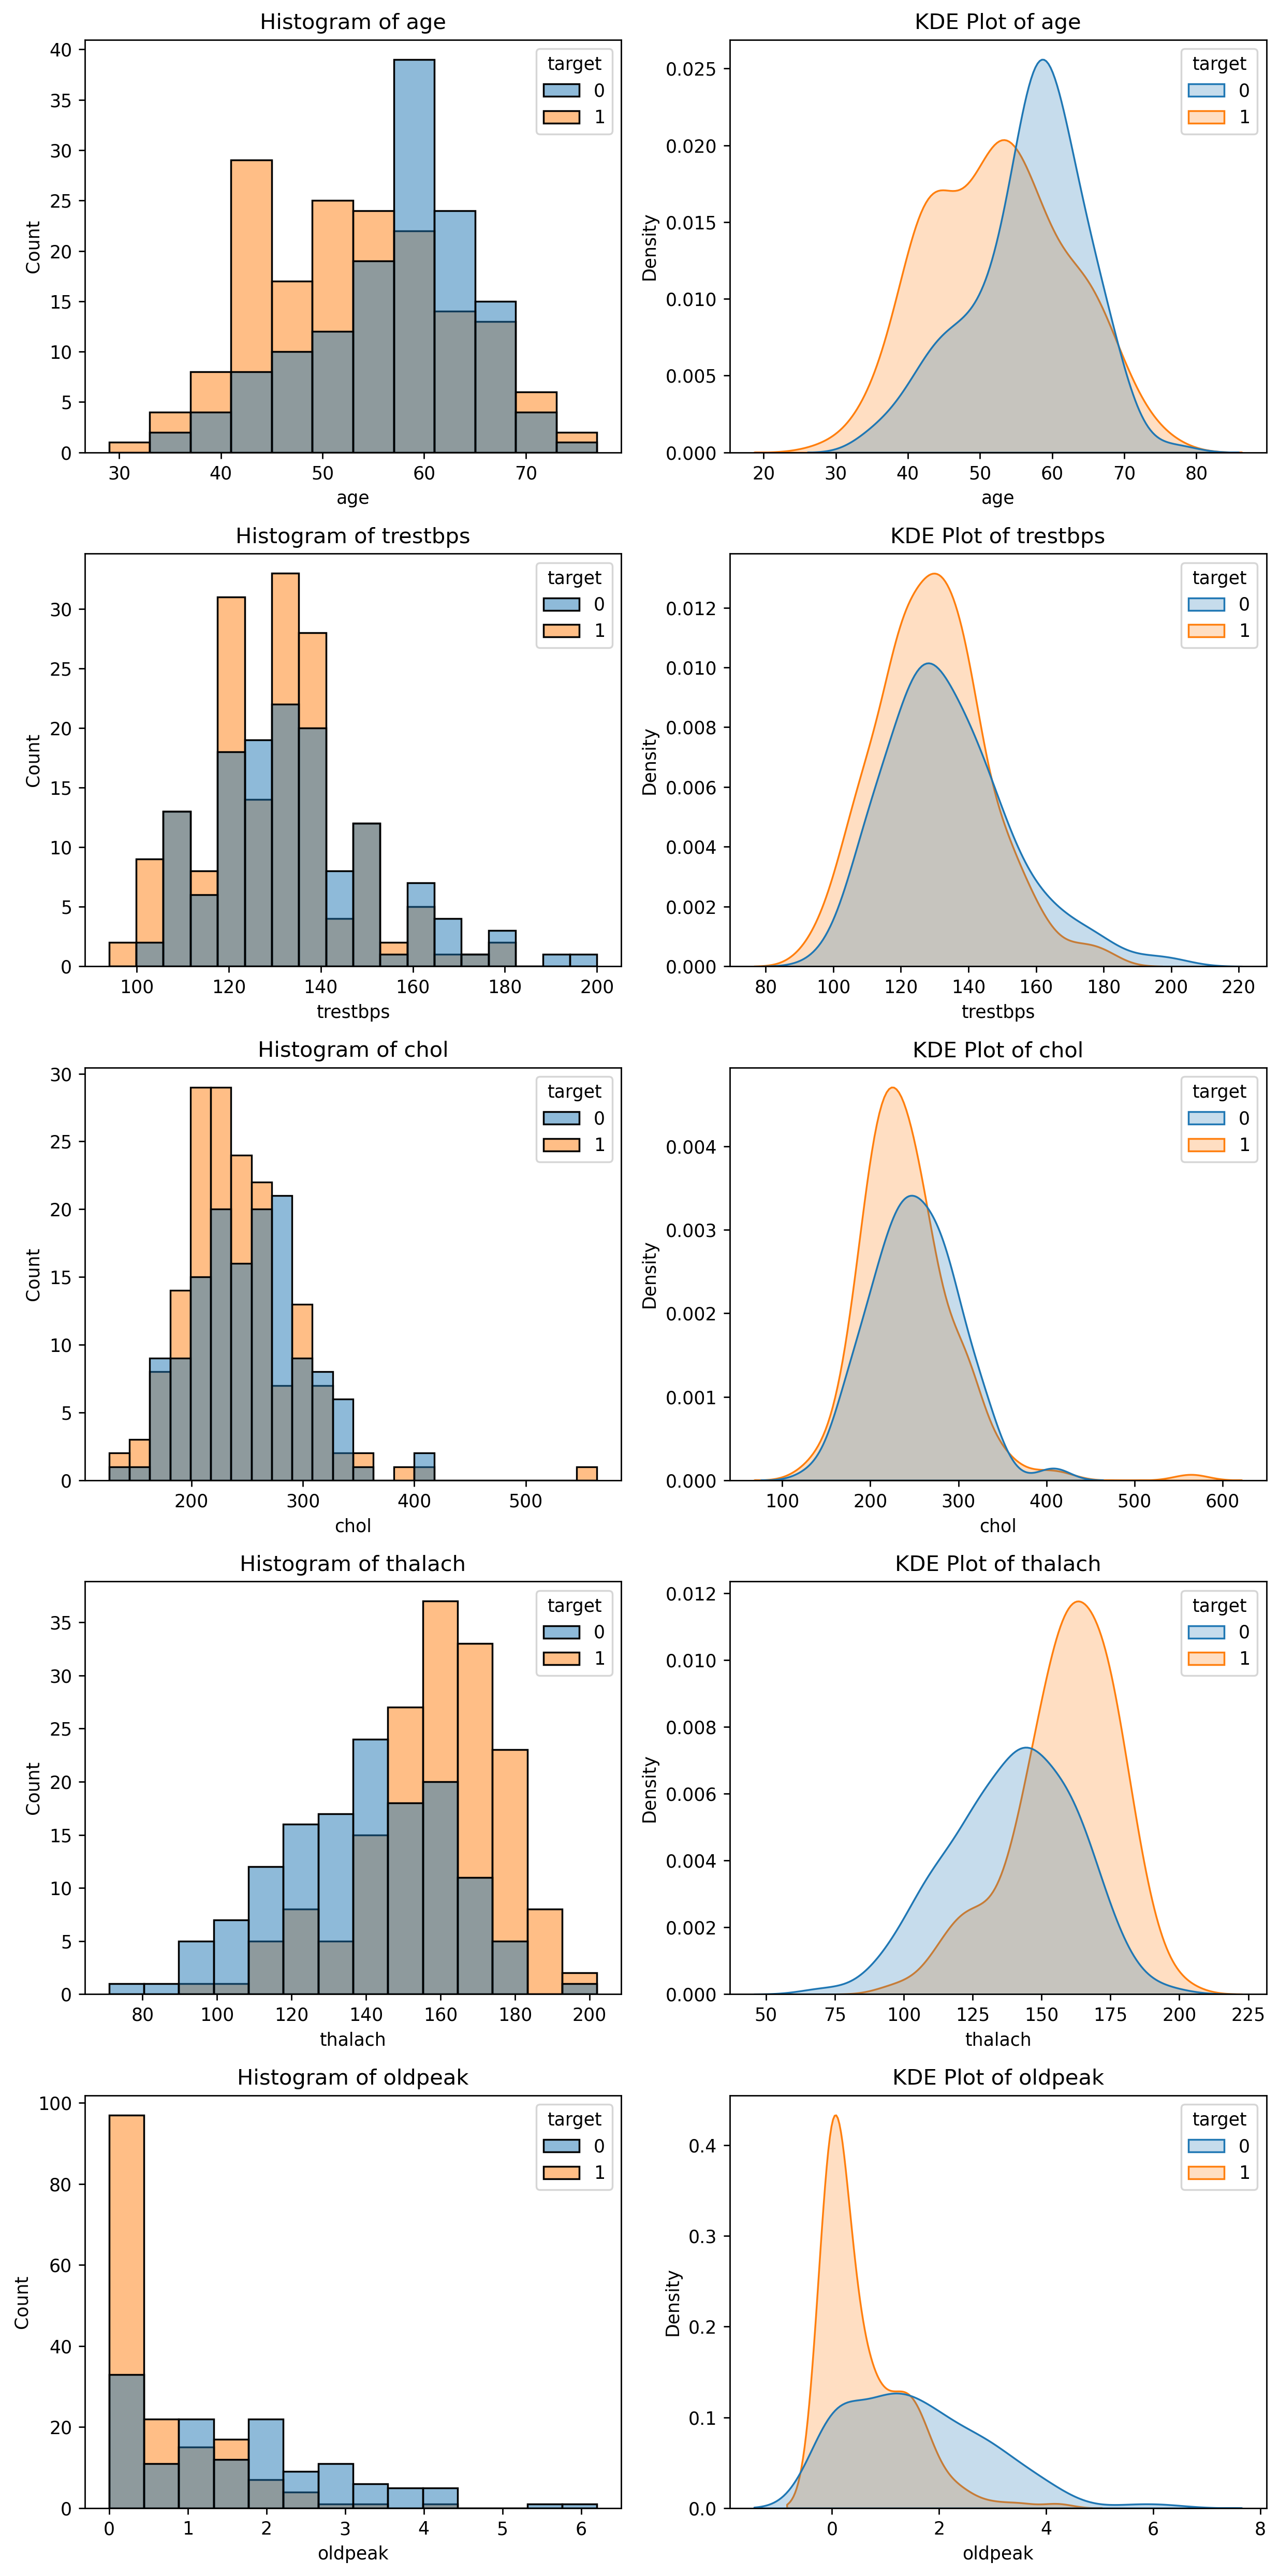

In [9]:

cont_cols = ['age','trestbps','chol','thalach','oldpeak']
fig, axes = plt.subplots(len(cont_cols),2, figsize=(10,20),dpi=250)
for i, col in enumerate(cont_cols):
    sns.histplot(df, x=col, hue='target', ax=axes[i,0], kde=False)
    sns.kdeplot(df, x=col, hue='target', ax=axes[i,1],fill=True)
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,1].set_title(f'KDE Plot of {col}')
    axes[i,0].set_xlabel(col)
    axes[i,1].set_xlabel(col)
plt.savefig('visualisations/univariate_distributions_of_continuous_features.png');
plt.tight_layout();

## Boxplots of Continuous Features by Heart Disease Status

Boxplots summarize the median, interquartile range, and potential outliers for each continuous feature, side-by-side for patients **with** vs. **without** heart disease.

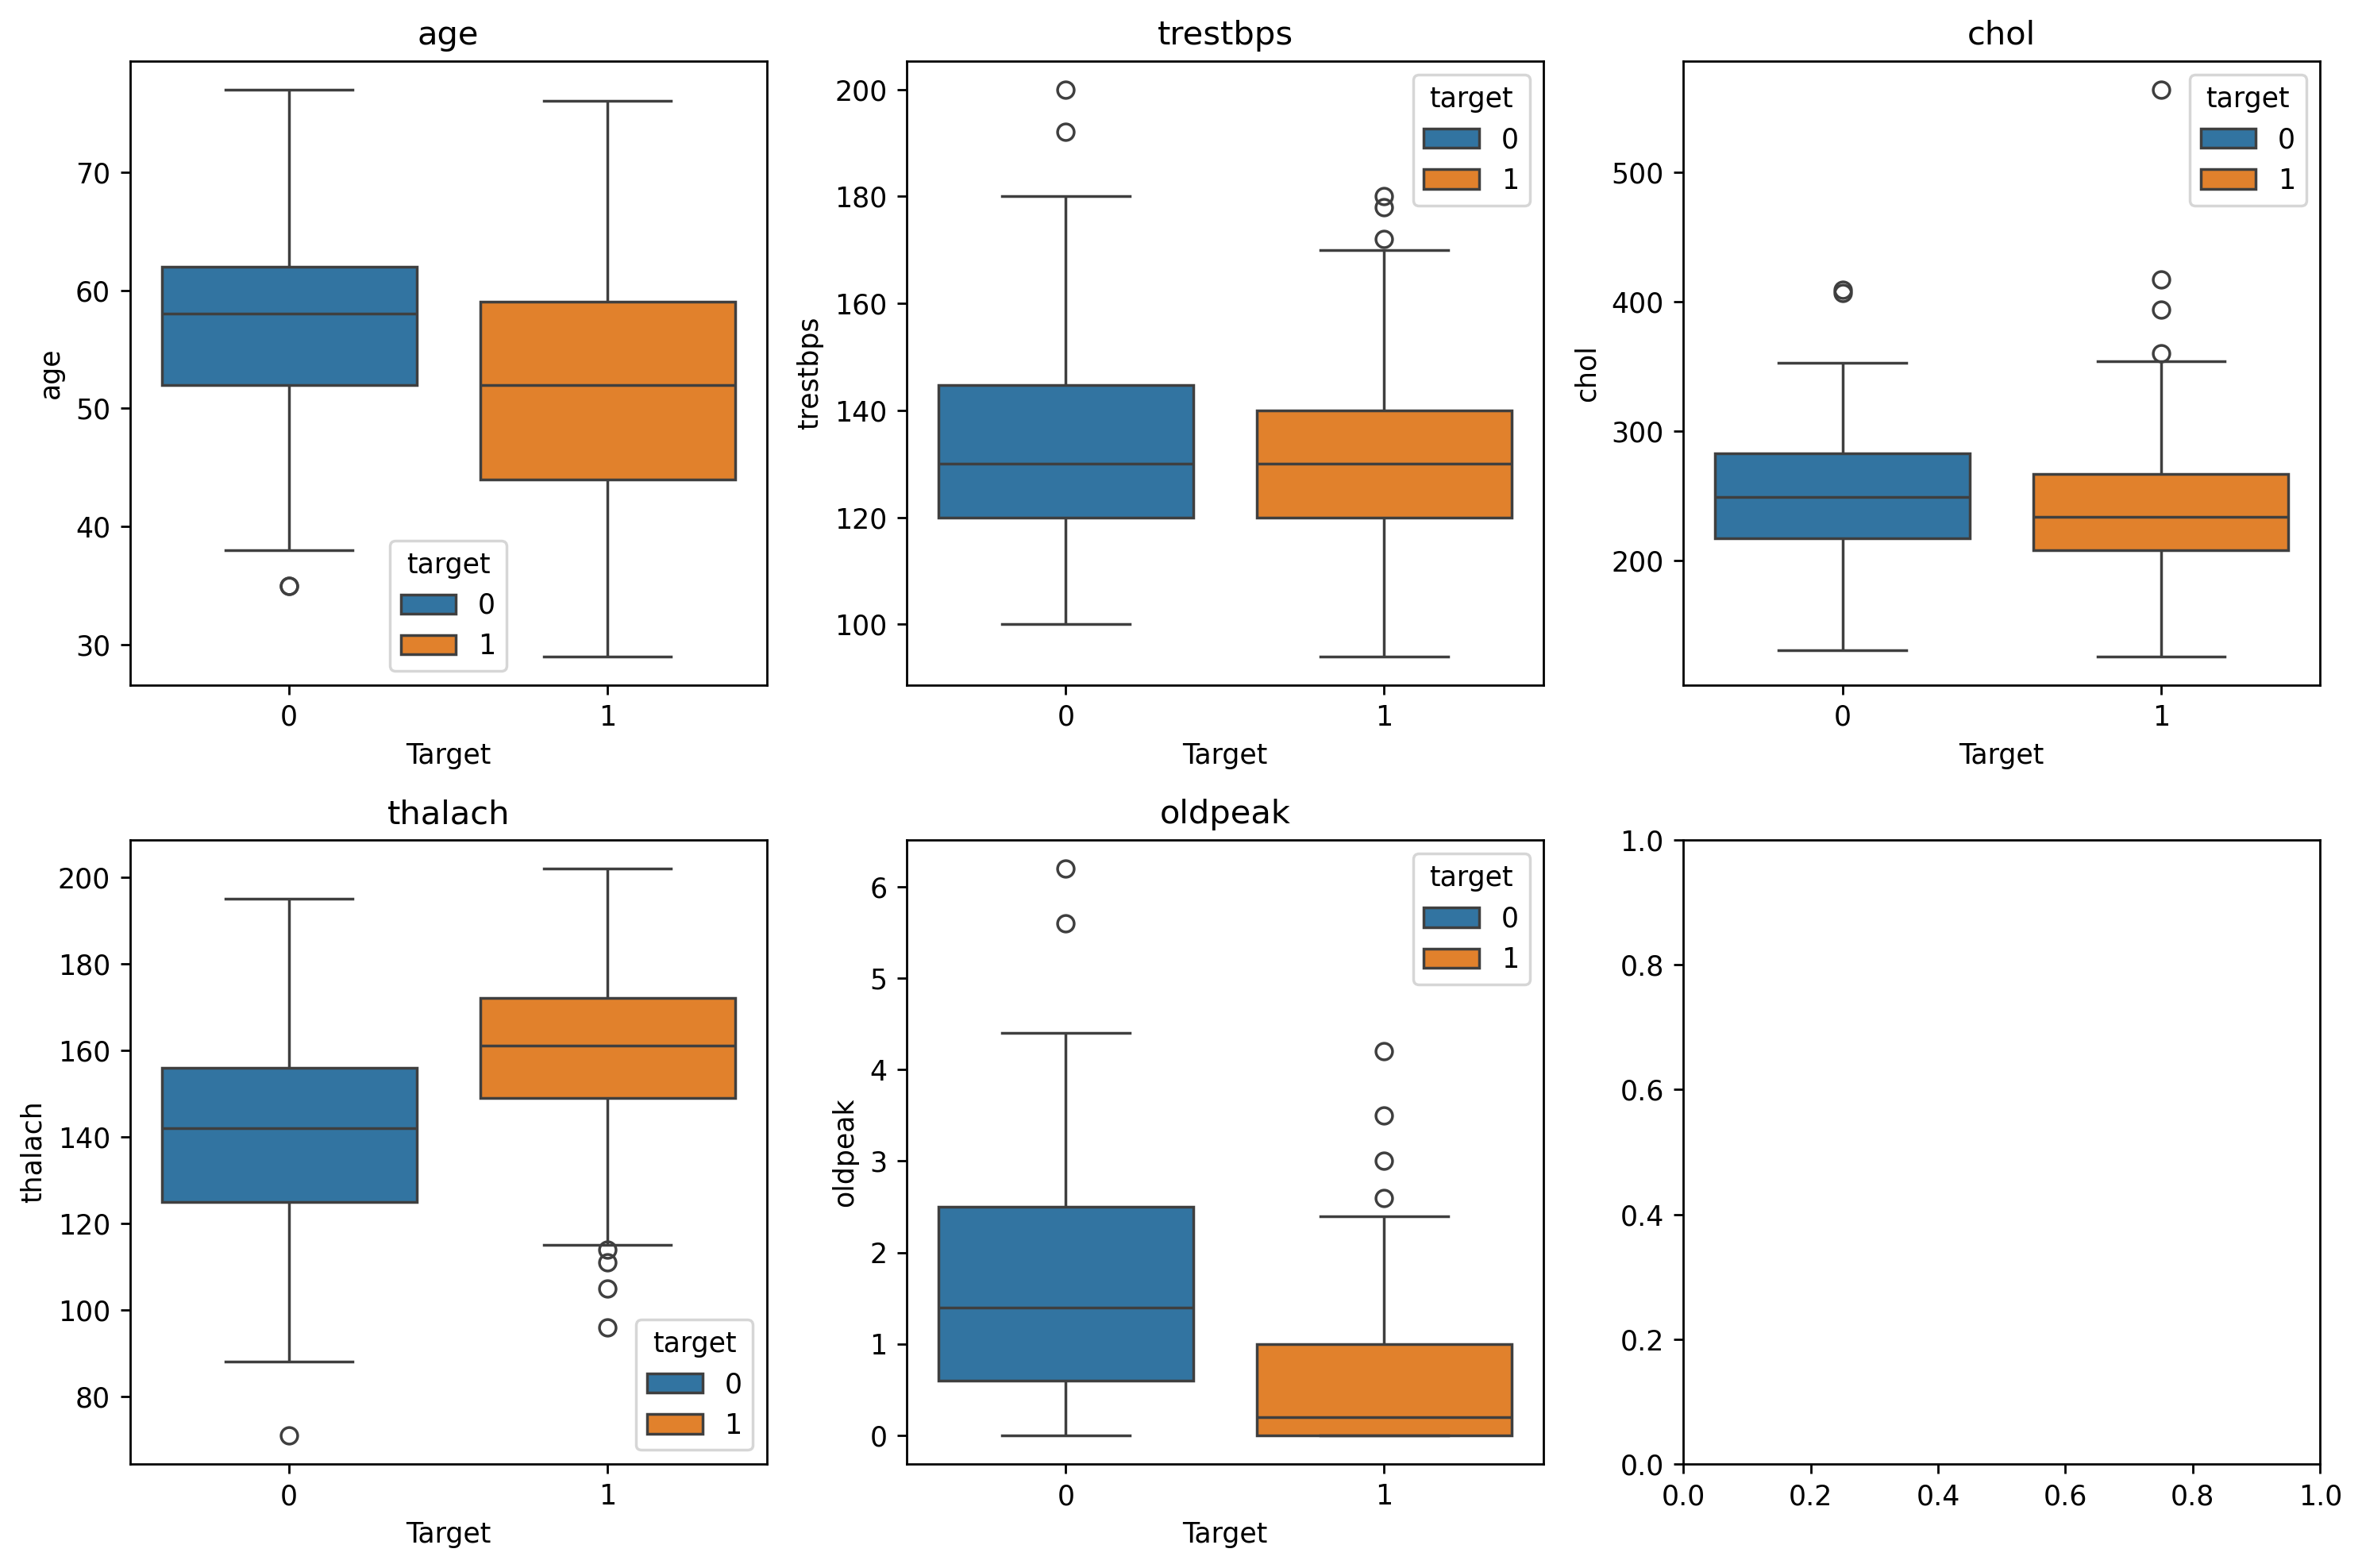

In [10]:
fig, axes = plt.subplots(2,3, figsize=(12,8),dpi=250)
for ax, col in zip(axes.flatten(), cont_cols):
    sns.boxplot(x='target', y=col, data=df, ax=ax,hue='target')
    ax.set_title(col)
    ax.set_xlabel('Target')
    ax.set_ylabel(col)
plt.savefig('visualisations/boxplots_of_continuous_features_by_heart_disease_status.png');
plt.tight_layout()

## Joint Distributions of Key Feature Pairs

We pair two important variables (e.g. **age vs. cholesterol**) and show both their bivariate relationship and marginal distributions.  
- Scatter + marginals for direct comparison  
- KDE contour for density-based view  

This can highlight clusters or separation between the two classes.

<Figure size 3000x1000 with 0 Axes>

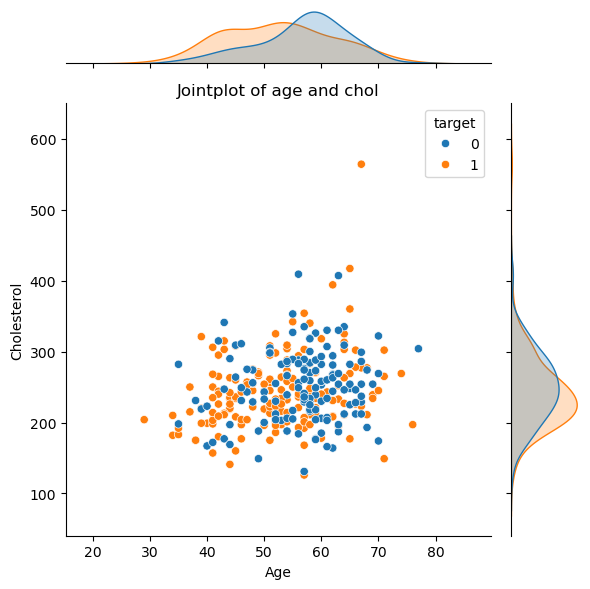

In [11]:
plt.figure(figsize=(12,4),dpi=250)
sns.jointplot(data=df, x='age', y='chol', hue='target', kind='scatter', height=6)
plt.title('Jointplot of age and chol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.savefig('visualisations/jointplot_of_age_and_chol.png');
plt.tight_layout();

<Figure size 3000x1000 with 0 Axes>

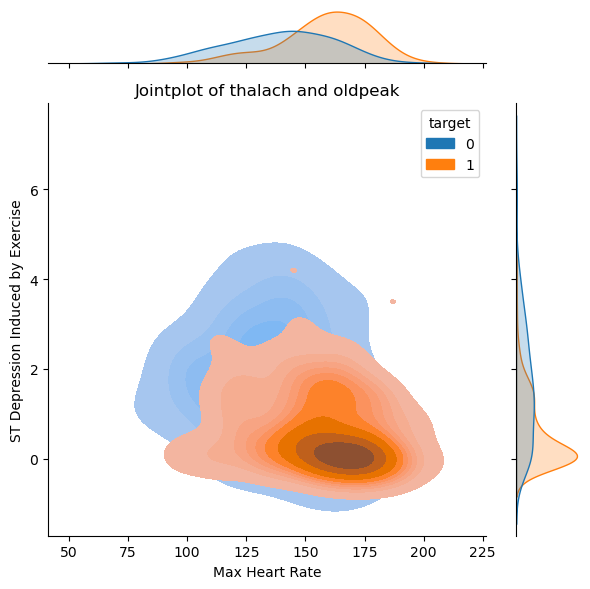

In [12]:
plt.figure(figsize=(12,4),dpi=250)
sns.jointplot(data=df, x='thalach', y='oldpeak', hue='target', kind='kde', height=6,fill=True)
plt.title('Jointplot of thalach and oldpeak')
plt.xlabel('Max Heart Rate')
plt.ylabel('ST Depression Induced by Exercise')
plt.savefig('visualisations/jointplot_of_thalach_and_oldpeak.png')
plt.tight_layout();

## Categorical Features Count by Heart Disease

For each discrete/categorical attribute (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`), we plot counts split by `target`.  
This reveals which categories are more/less common in diseased vs. healthy patients.

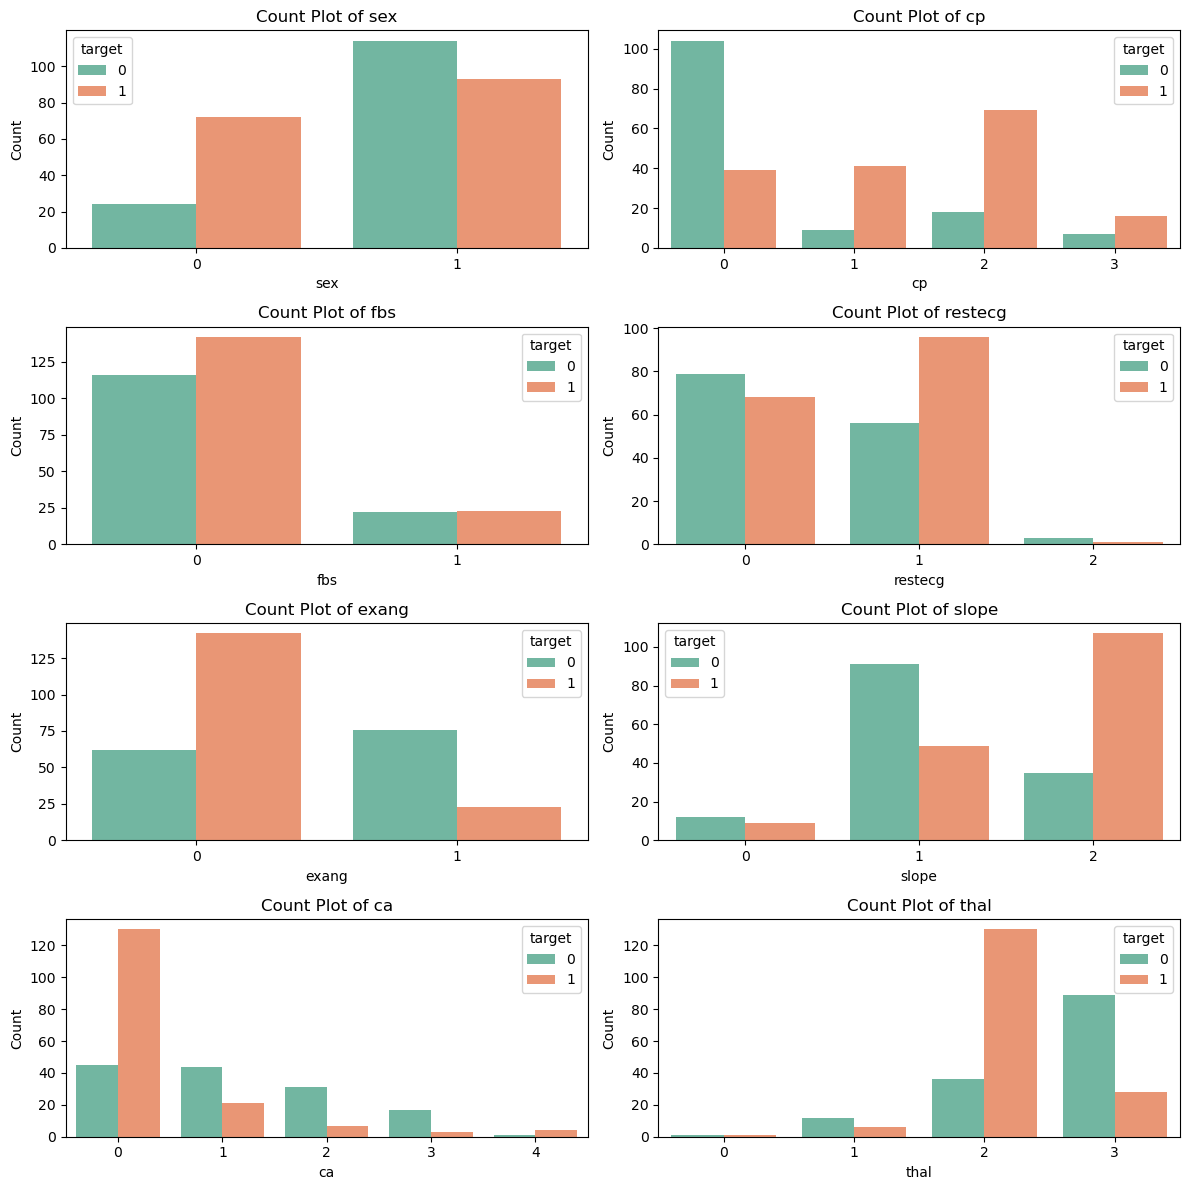

In [13]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
fig, axes = plt.subplots(4,2, figsize=(12,12))
for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(data=df, x=col, hue='target', palette='Set2', ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
plt.savefig('visualisations/count_plot_of_categorical_features.png')
plt.tight_layout()

## Age Distribution Faceted by Sex & Heart Disease

Here we facet **age** histograms by `sex` (rows) and `target` (columns).  
This shows how age profiles differ not only by disease status but also between male / female patients.

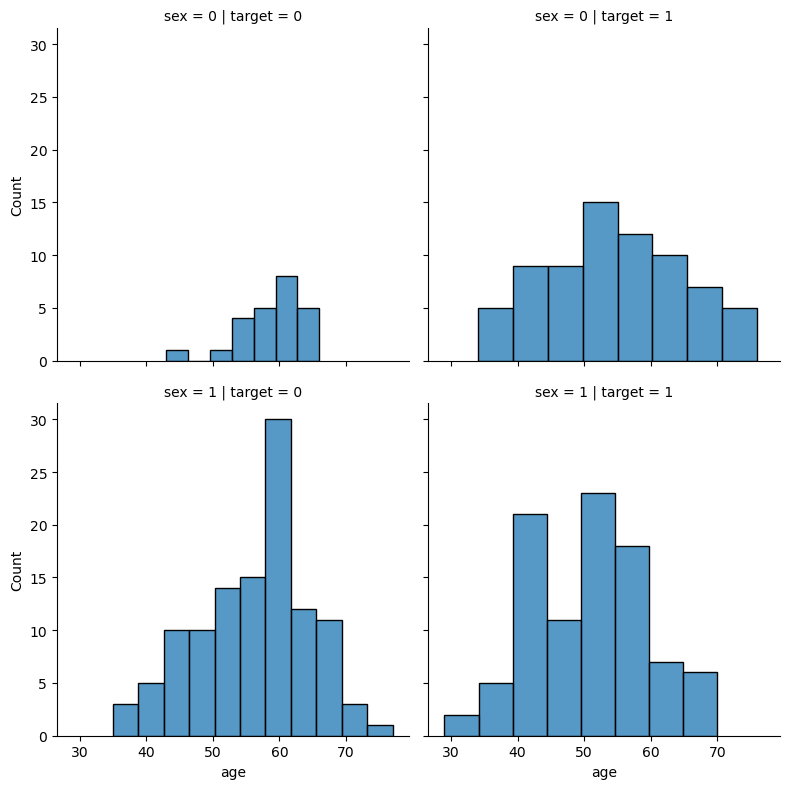

In [14]:
g = sns.FacetGrid(df, row='sex', col='target', height=4)
g.map(sns.histplot, 'age')
plt.savefig('visualisations/facet_grid_of_age_by_sex_and_target.png')
plt.tight_layout()


## PairPlot: KDE on the Diagonal, Scatter Off-Diagonal

We create a `PairGrid` for `[age, trestbps, chol, thalach, oldpeak]` colored by `target`:
- **Diagonal**: KDE plots to emphasize distribution  
- **Off‐diagonal**: scatterplots to explore pairwise relationships.
   
*Note: Running a pairplot on everything can take a very long time due to the number of features, as such using only selected features*

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

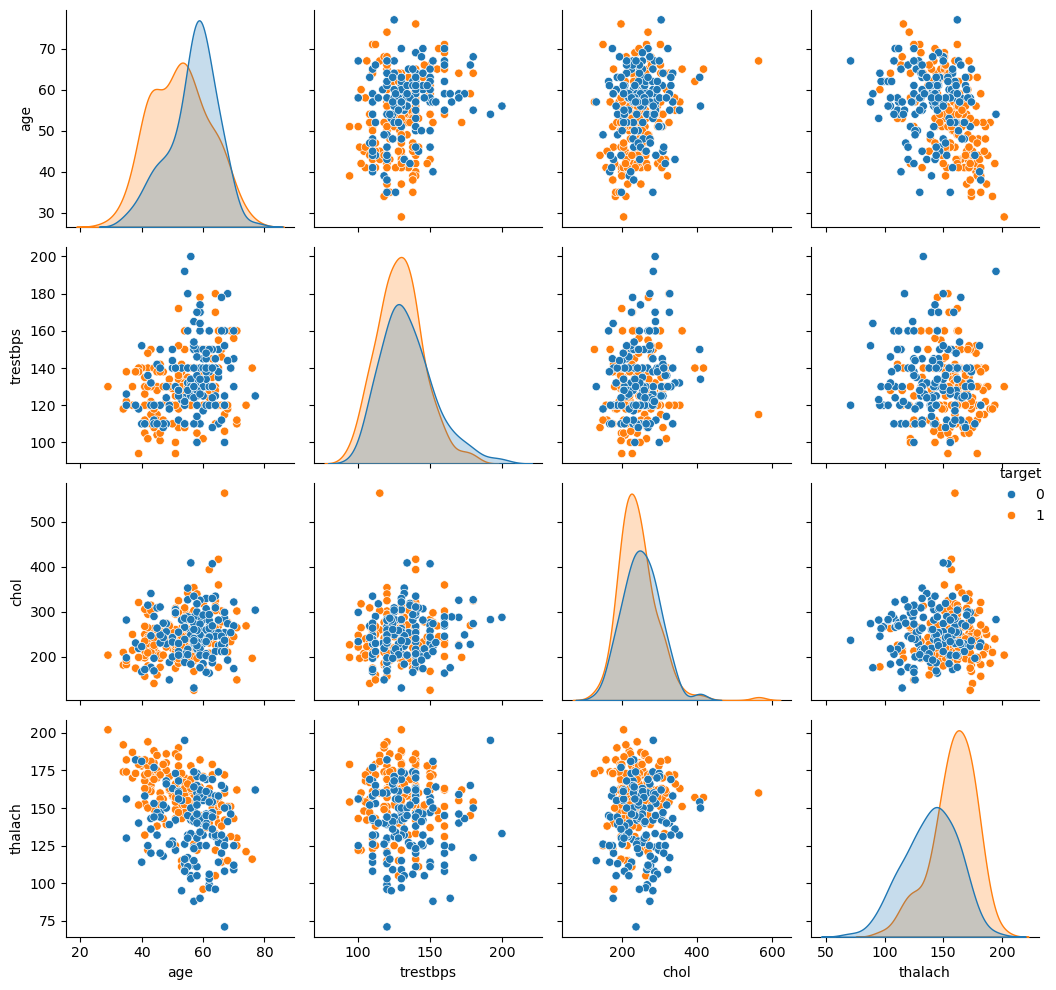

In [16]:
# Running pairplot on everything will take a very long time to render!
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')
plt.savefig('visualisations/pairplot_of_age_trestbps_chol_thalach_target.png')
plt.tight_layout();

## Correlation Clustermap
**A heatmap that displays the correlation between all the columns.**

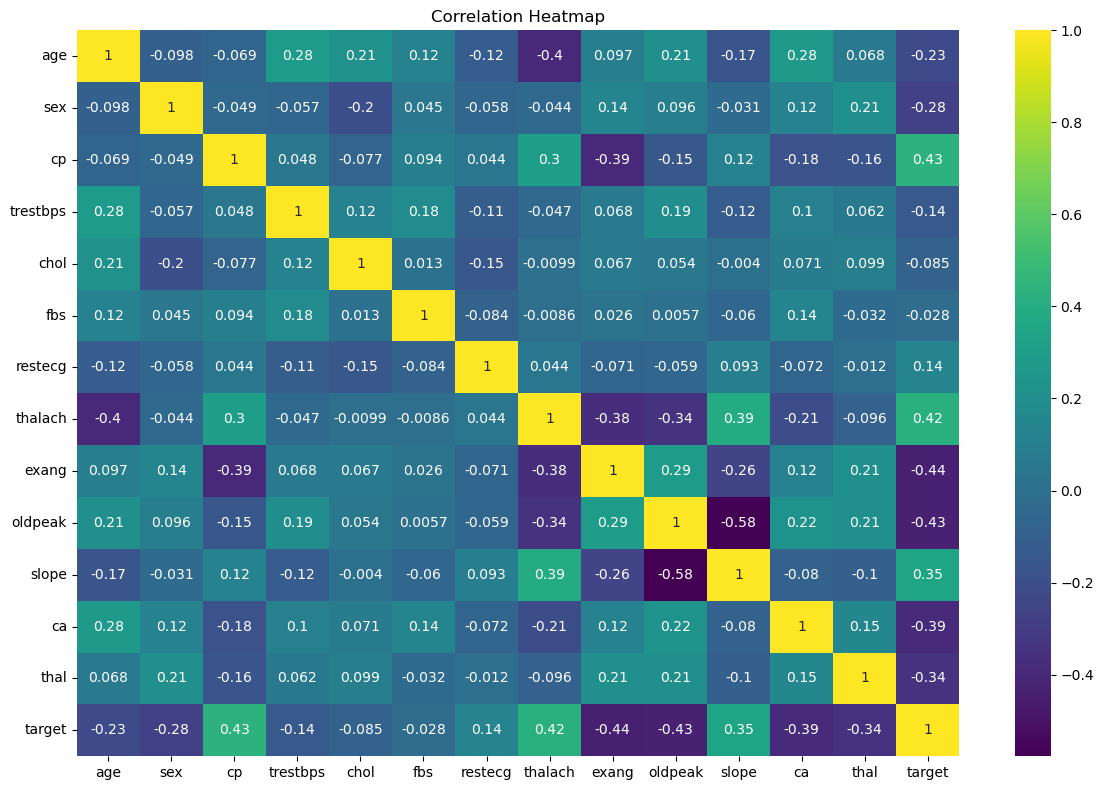

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.title('Correlation Heatmap')
plt.savefig('visualisations/correlation_heatmap.png')
plt.tight_layout();

## Correlation Clustermap

Hierarchical clustering on the correlation matrix groups together highly correlated features.  
Look for blocks of variables that move in tandem and may be redundant.

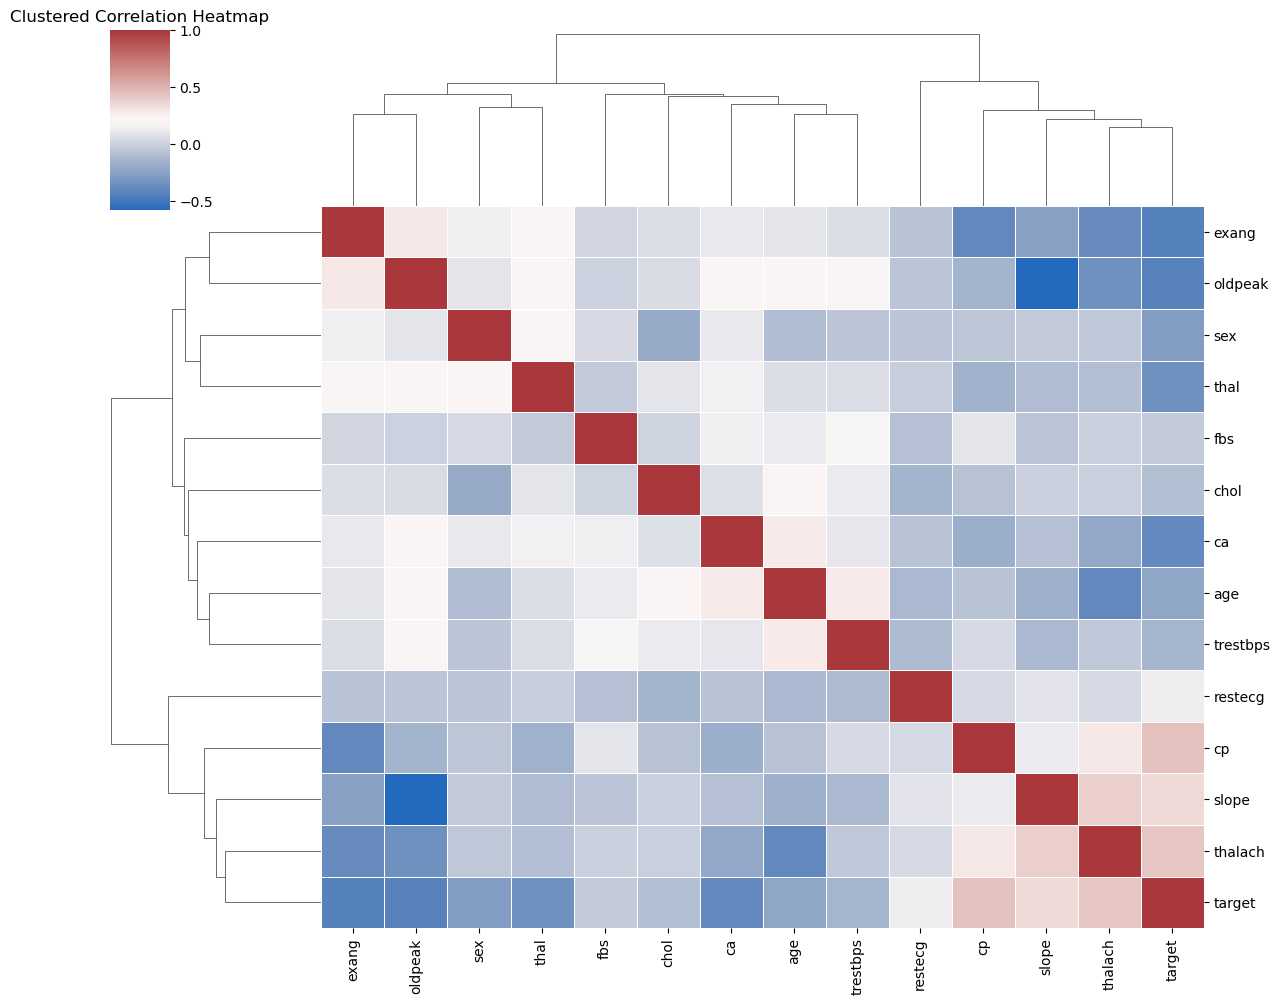

In [18]:
sns.clustermap(df.corr(), cmap='vlag', linewidths=0.5, figsize=(12,10))
plt.title('Clustered Correlation Heatmap')
plt.savefig('visualisations/clustered_correlation_heatmap.png');

----
----

# Machine Learning

## 3. Train/Test Split & Feature Scaling

Before we fit our logistic regression model, we need to prepare the data:

1. **Separate features and labels**  
   - Extract `X` (all columns except `target`) and `y` (`target` column).  

In [19]:
X = df.drop('target',axis=1)
y = df['target']

2. **Split into training and test sets**  
   - Use `train_test_split(X, y, test_size=0.1, random_state=42)`  
   - This gives us unseen data in `X_test`, `y_test` for a fair evaluation.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

3. **Standardize the features**  
   - Instantiate `StandardScaler()`  
   - Fit on `X_train` and transform both `X_train` and `X_test`  
   - Ensures each feature has mean = 0 and Standard Deviation = 1, which helps model convergence and comparability.

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## 3.5 Establishing a Baseline

Before we build our logistic regression model, let’s set a simple reference point:

**Majority-class baseline**  
    – Always predict the most common class (`target=0` or `1`)  
    – This represents an “uninformed” model that ignores all features.  

> **Why this matters:**  
> Logistic regression model must outperform this trivial rule to prove it’s learning meaningful patterns in the data.  

### Baseline with DummyClassifier

To gauge how hard our task is, we first train a trivial “most frequent” model that ignores all features:

- Always predicts the majority class from the training set  
- Uses scikit-learn’s `DummyClassifier(strategy="most_frequent")`  
- Serves as an “uninformed” reference point that any real model must beat

In [23]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print(f"DummyClassifier baseline: {dummy.score(X_test, y_test):.4%}")

DummyClassifier baseline: 51.6129%


#### Evaluating the DummyClassifier

> Here we show precision, recall, and F1 for both classes under the “always-predict-majority” rule.  
> Note the zero-division warnings are handled by `zero_division=0`.

In [24]:
print(classification_report(y_test, dummy.predict(X_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.52      1.00      0.68        16

    accuracy                           0.52        31
   macro avg       0.26      0.50      0.34        31
weighted avg       0.27      0.52      0.35        31



#### ROC Curve for the Dummy Baseline
_____________________________
---------------------------
______________________
> The ROC for a frequency-only predictor hugs the diagonal (random performance).  
> Any real classifier should push the curve upward/right to show genuine signal.

Text(0.5, 1.0, 'Baseline ROC Curve')

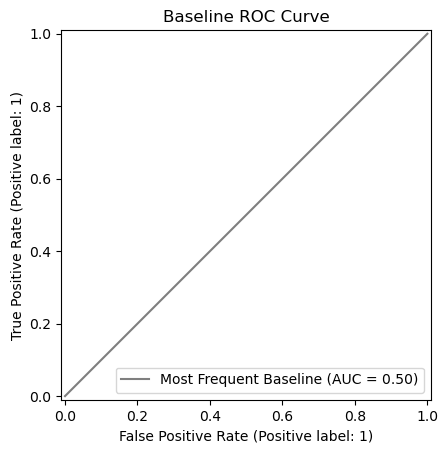

In [25]:
# 3) Plot the ROC curve
RocCurveDisplay.from_estimator(
    dummy, X_test, y_test,
    name="Most Frequent Baseline",
    color="tab:gray"
)
plt.title("Baseline ROC Curve")

## 4. Building & Tuning a Logistic Regression Classifier

**Objective:** Train a logistic regression model to predict the presence of heart disease (`target`).  
Use cross‐validation to find the optimal regularization strength, **C**.

There are two equivalent strategies:

1.  Use `LogisticRegressionCV` to perform CV internally.  
2.  Wrap `LogisticRegression` in a `GridSearchCV` over a grid of C values.

Below we’ll follow the `GridSearchCV` approach.

In [26]:
# Defining the grid of hyperparameters
param_grid = {
    'C': np.logspace(-3, 3, 200),            
    'solver': ['saga','lbfgs','liblinear','newton-cg','sag'],
    'penalty': ['l2'],
    'max_iter': [100000],
}

In [27]:
# Using stratified 10-fold CV to preserve class balance
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [28]:
# GridSearch
grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

In [29]:
grid.fit(scaled_X_train,y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.07189132e-03, 1.14895100e-03, 1.23155060e-03,
       1.32008840e-03, 1.41499130e-03, 1.51671689e-03, 1.62575567e-03,
       1.74263339e-03, 1.86791360e-03, 2.00220037e-03, 2.14614120e-03,
       2.30043012e-03, 2.46581108e-03, 2....
       3.52970730e+02, 3.78346262e+02, 4.05546074e+02, 4.34701316e+02,
       4.65952567e+02, 4.99450512e+02, 5.35356668e+02, 5.73844165e+02,
       6.15098579e+02, 6.59318827e+02, 7.06718127e+02, 7.57525026e+02,
       8.11984499e+02, 8.70359136e+02, 9.32930403e+02, 1.00000000e+03]),
                         'max_iter': [100000], 'penalty': ['l2'],
                         'solver': ['saga', 'lbfgs', 'liblinear', 'newton-cg',
                                    'sag']},
             scoring='accuracy', verbose=1)

## Reporting the Optimal Regularization Strength (C)

Once cross‐validation completes, extract and display the best value of **C** found:

- **C** is the inverse of regularization strength  
  - Larger C → less regularization  
  - Smaller C → more regularization  

> **Note:** Your exact C may differ depending on your CV splits and search grid.

In [30]:
model = grid.best_estimator_

In [31]:
model.C

0.03448962260405758

In [32]:
model.get_params()

{'C': 0.03448962260405758,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Feature Importance via Coefficients

Logistic regression coefficients tell us:

- Which features push the prediction towards “heart disease” (positive coefficients)  
- Which features push away from heart disease (negative coefficients)  

Plot a bar chart of `coef_` sorted by magnitude to interpret the most influential variables.

In [33]:
model.coef_

array([[-0.09311158, -0.34577565,  0.48300974, -0.12325087, -0.07699631,
         0.01998801,  0.07587987,  0.28114197, -0.31592228, -0.32764792,
         0.23210232, -0.4493661 , -0.34248766]])

In [34]:
coefs = pd.Series(index=X.columns,data=model.coef_[0])

In [35]:
coefs = coefs.sort_values()

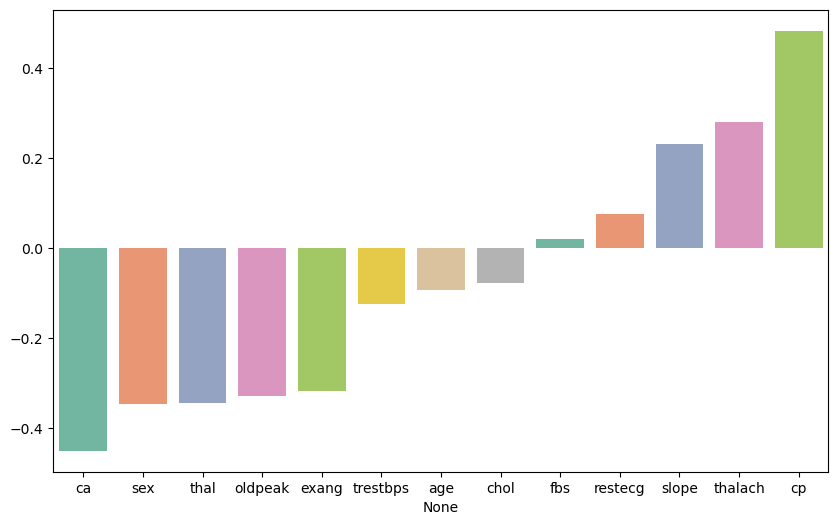

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values,hue=coefs.index,palette='Set2');

## 5. Model Performance Evaluation

Now that our logistic regression model is trained and tuned, we assess its performance on the held-out test set.  
We will use both tabular metrics and graphical diagnostics to get a complete picture of how well the model is doing.

In [37]:
y_pred = model.predict(scaled_X_test)

### 5.1 Confusion Matrix

Compute and display the confusion matrix to see:

- **True Negatives (TN)**  
- **False Positives (FP)**  
- **False Negatives (FN)**  
- **True Positives (TP)**  

This shows exactly how many samples were misclassified in each category.

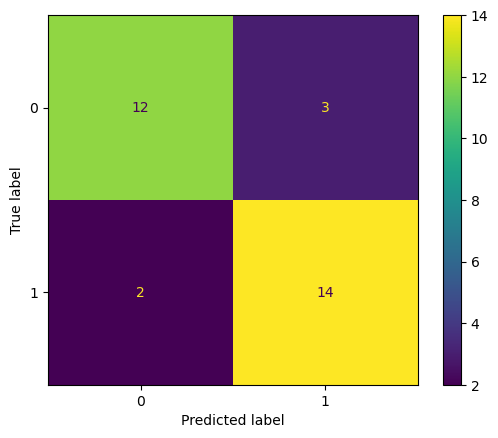

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

### 5.2 Classification Report

Using `classification_report` to report:

- Precision  
- Recall  
- F1-score  
- Support (number of samples per class)  

for each class. This goes beyond overall accuracy and tells us where the model is trading off false positives vs. false negatives.

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

### 5.3 Precision–Recall Curve

Especially when classes are imbalanced, the Precision–Recall curve is critical:

- **Precision** vs. **Recall** across thresholds  
- Helps identify the threshold that best balances false alarms and missed positives  

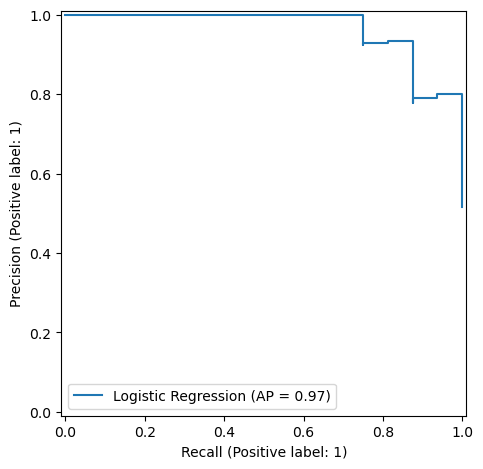

In [40]:
PrecisionRecallDisplay.from_estimator(model,scaled_X_test,y_test,name='Logistic Regression')
plt.savefig('visualisations/precision_recall_curve.png')
plt.tight_layout();

### 5.4 ROC Curve & AUC

Plot the Receiver Operating Characteristic (ROC) curve:

- **True Positive Rate** vs. **False Positive Rate** across thresholds  
- Compute the **Area Under the Curve (AUC)** as a single-number summary of separability  

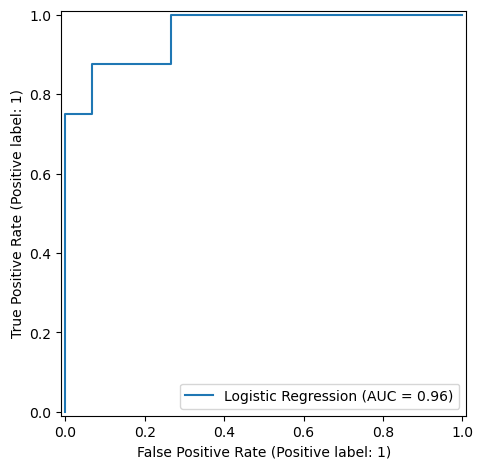

In [41]:
RocCurveDisplay.from_estimator(model,scaled_X_test,y_test,name='Logistic Regression')
plt.savefig('visualisations/roc_curve.png')
plt.tight_layout();

## 6. Model Persistence

Once we’ve trained and validated our final logistic regression model, we want to save it for later use—without having to re‐train. Persisting the model to disk is essential for:

- **Reproducibility:** Load the exact same model in future analyses  
- **Efficiency:** Skip the expensive training step when making predictions  
- **Deployment:** Ship the model to a production environment or API  

Below we’ll use `joblib` to serialize the trained estimator and then demonstrate reloading it for inference.

In [42]:
dump(grid.best_estimator_, 'models/logistic_model.joblib')
print("Model saved to disk as 'logistic_model.joblib'")

Model saved to disk as 'logistic_model.joblib'


### 7. Case Study: Single‐Patient Prediction

Now that our logistic regression model is finalized, let’s see how it performs on a real‐world example:

#### 7.1 Patient Profile

Below is the clinical profile for an incoming patient. We will feed these same features into our model:

| Feature    | Value | Description                                                  |
|------------|-------|--------------------------------------------------------------|
| age        | 48.0  | Patient age in years                                         |
| sex        | 0.0   | 0 = female, 1 = male                                         |
| cp         | 2.0   | Chest pain type (0–3)                                        |
| trestbps   | 130.0 | Resting blood pressure (mm Hg)                               |
| chol       | 275.0 | Serum cholestoral in mg/dl                                   |
| fbs        | 0.0   | Fasting blood sugar > 120 mg/dl (0 = false, 1 = true)        |
| restecg    | 1.0   | Resting electrocardiographic results (0–2)                   |
| thalach    | 139.0 | Maximum heart rate achieved                                  |
| exang      | 0.0   | Exercise-induced angina (0 = no, 1 = yes)                    |
| oldpeak    | 0.2   | ST depression induced by exercise relative to rest           |
| slope      | 2.0   | Slope of the peak exercise ST segment (0–2)                  |
| ca         | 0.0   | Number of major vessels (0–3) colored by fluoroscopy         |
| thal       | 2.0   | 1 = normal; 2 = fixed defect; 3 = reversable defect          |

**What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [43]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

#### 7.2 Model Inference: Prediction & Confidence

We’ll now pass this feature vector through our trained model to:

1. **Predict** the class label  
   - `0` = no heart disease  
   - `1` = presence of heart disease  
2. **Estimate** the model’s confidence (predicted probabilities)

This dual output lets us see both the categorical decision and how “sure” the model is about it.

In [44]:
model = load('models/logistic_model.joblib')

In [45]:
model.predict(patient)

array([0])

In [46]:
print(model.predict_proba(patient).round(7))
print(f"The model predicts that the patient has a {model.predict_proba(patient)[0][1]:.7%} chance of having heart disease.")

[[9.999959e-01 4.100000e-06]]
The model predicts that the patient has a 0.0004079% chance of having heart disease.
